In [4]:
import sys
sys.path.insert(0, '..')
import pandas as pd
import dotplot
import dotplot.utils

%config InlineBackend.figure_format = 'retina'

In [6]:
term_list = ['GO:0002455', 'GO:0006958', 'GO:0006956', 'GO:0038096','GO:0002673',
             'GO:0051251', 'GO:0060333', 'GO:0006910','GO:0002483', 'GO:0002440',
             'GO:0009141', 'GO:0009123', 'GO:0006119', 'GO:0009260', 'GO:0015985', 'GO:0015986', 'GO:0006260',
            'GO:0044843', 'GO:0061621', 'GO:0061718']

up = pd.read_csv('./example_data/group1.csv', header=0, index_col=0)
down = pd.read_csv('./example_data/group2.csv', header=0, index_col=0)

In [7]:
data = dotplot.utils.merge_clusterprofile_results(dataframes=(up, down), groups=['B6_up', 'B6_down'], term_list=term_list)
data.head()

../dotplot/utils.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _sub_df[group_key] = _group


,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count,group
ID,,,,,,,,,
GO:0002455,humoral immune response mediated by circulatin...,22/178,150/18670,19.365993,16.222197,16.298589,HLA-DQB1/CD55/IGHM/PTPRC/TRBC2/IGHG2/IGKV3-20/...,22,B6_up
GO:0006958,"complement activation, classical pathway",20/178,137/18670,17.588789,14.989062,15.065454,CD55/IGHM/TRBC2/IGHG2/IGKV3-20/IGHV4-34/IGHV3-...,20,B6_up
GO:0006956,complement activation,20/178,175/18670,15.453684,13.008859,13.085251,CD55/IGHM/TRBC2/IGHG2/IGKV3-20/IGHV4-34/IGHV3-...,20,B6_up
GO:0038096,Fc-gamma receptor signaling pathway involved i...,18/178,139/18670,14.916693,12.675988,12.752379,PTPRC/LYN/IGHG2/IGKV3-20/IGHV4-34/IGHV3-30/IGL...,18,B6_up
GO:0002673,regulation of acute inflammatory response,18/178,159/18670,13.871614,11.817674,11.894066,HLA-E/CD55/IGHG2/IGKV3-20/IGHV4-34/IGHV3-30/IG...,18,B6_up


../dotplot/core.py:143: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  s=self.resized_circle_data.values.flatten())


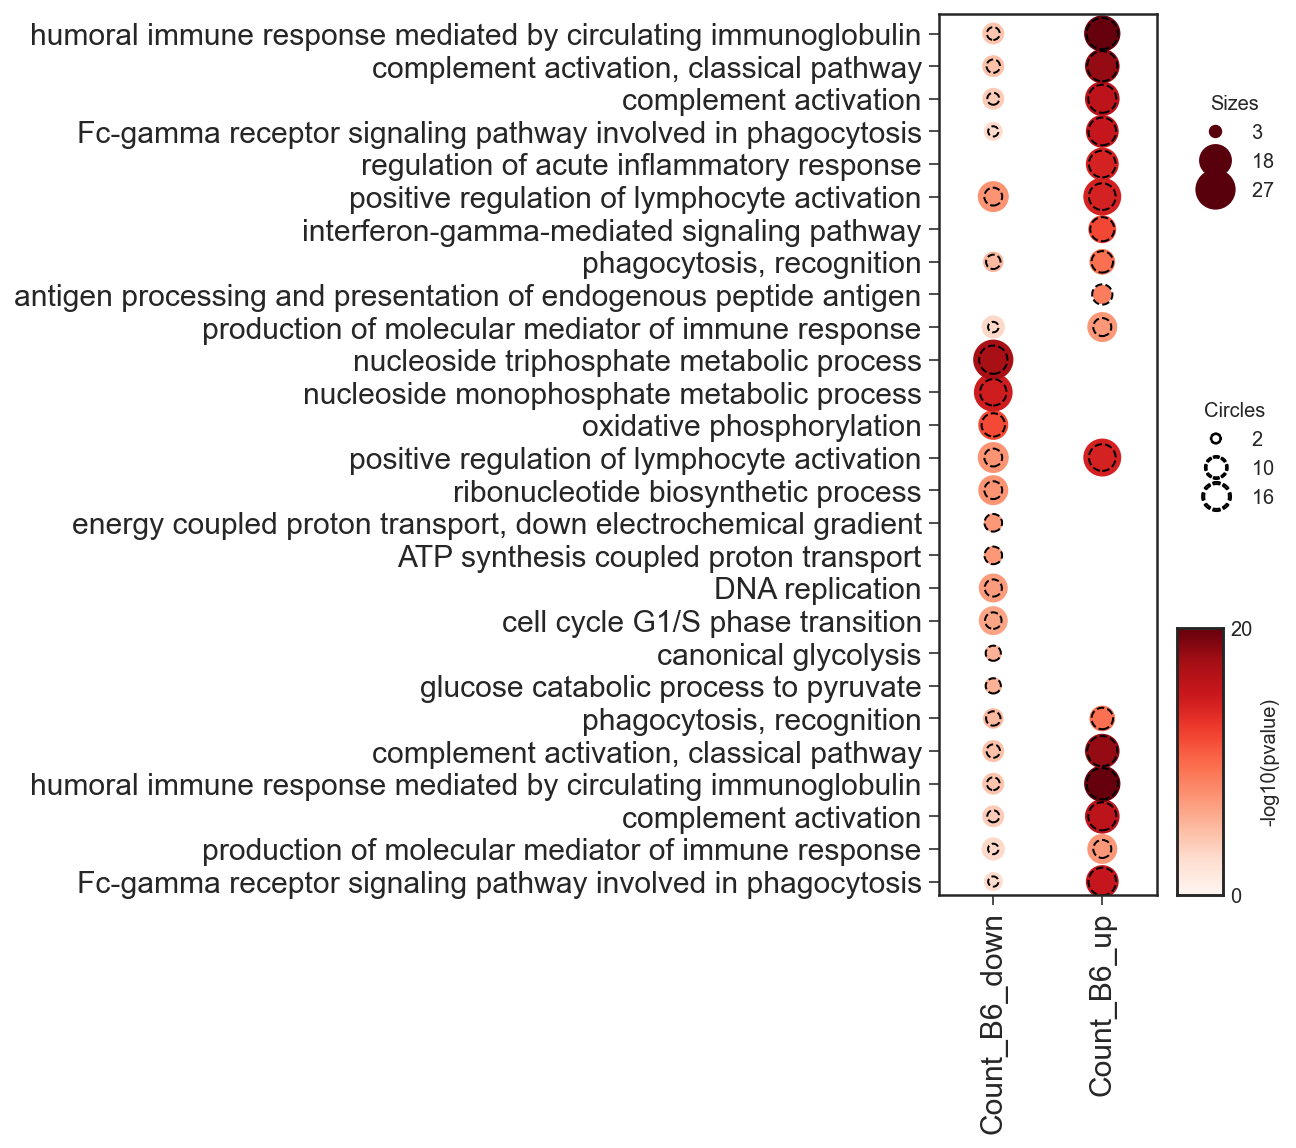

In [8]:
dp = dotplot.DotPlot.parse_from_tidy_data(data, **dotplot.utils.DEFAULT_CLUSTERPROFILE_KEYS)
sct = dp.plot(size_factor=15, cmap='Reds')

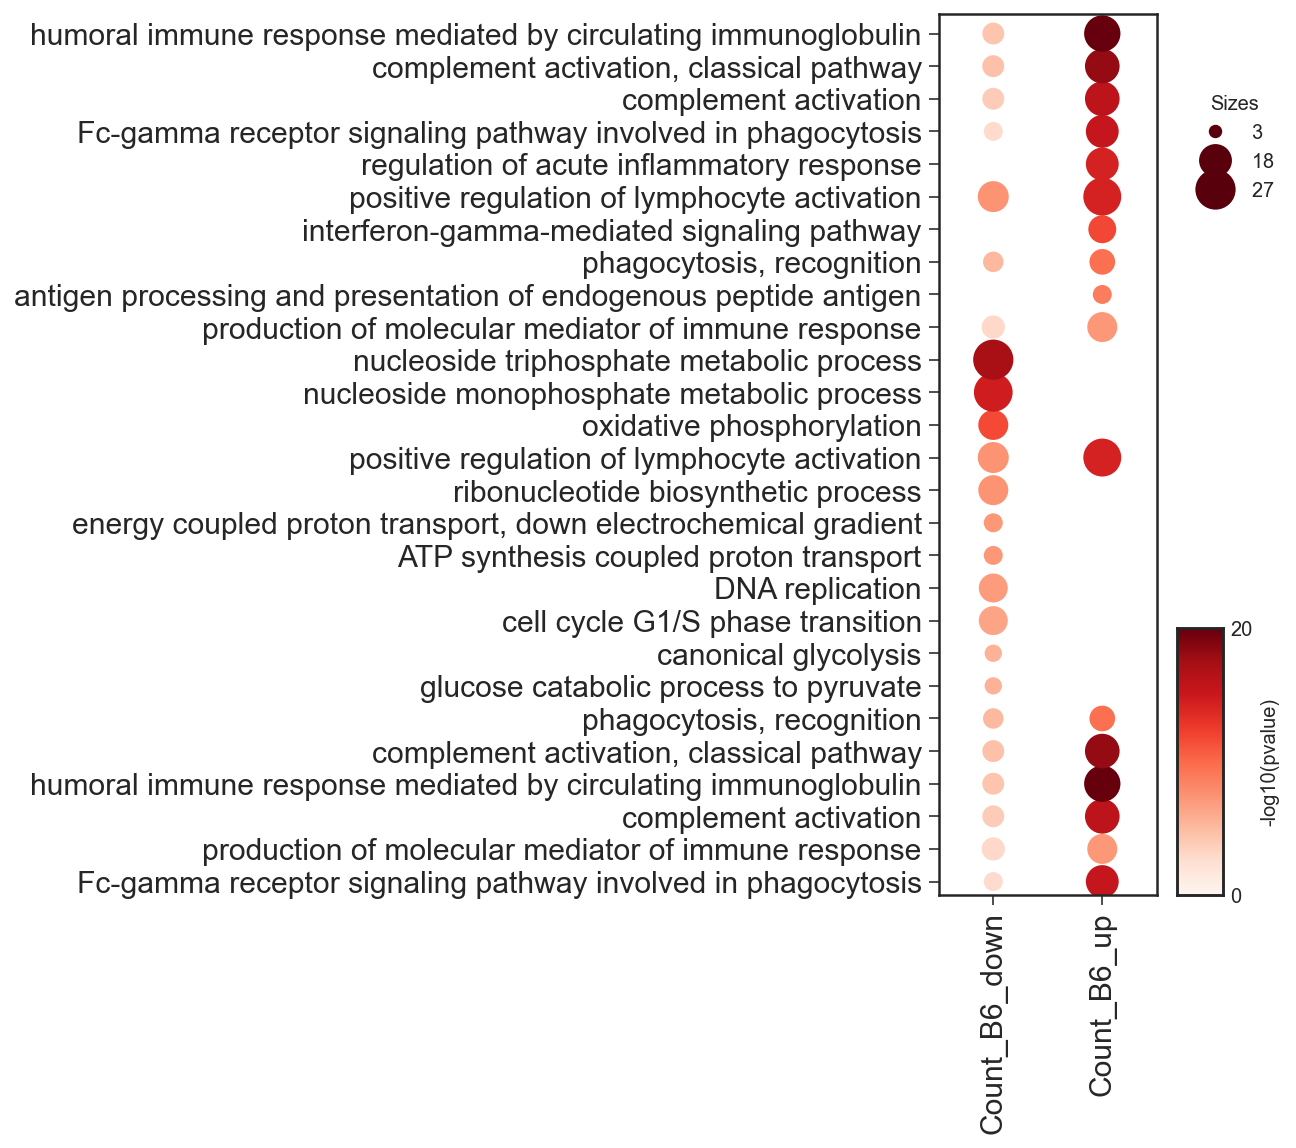

In [9]:
new_keys = {'item_key': 'Description','group_key': 'group','sizes_key': 'Count','color_key': 'pvalue'}
dp = dotplot.DotPlot.parse_from_tidy_data(data, **new_keys)
sct = dp.plot(cmap='Reds')